# Imports

In [70]:
import pandas as pd
import seaborn as sns
sns.set_theme()
from sklearn.linear_model import LogisticRegression

In [71]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [72]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


Test set is much more bigger than train set, and the latter is quite small so it will be challenge to create a model which will generalize well.  

In [73]:
print("Train set samples:", train.shape[0])
print("Train set features:", train.shape[1])

Train set samples: 250
Train set features: 302


In [74]:
print("Test set samples:", test.shape[0])
print("Test set features:", test.shape[1])

Test set samples: 19750
Test set features: 301


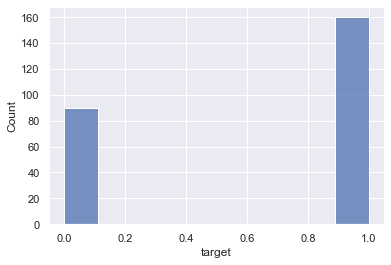

In [75]:
sns.histplot(data=train, x="target");

In [76]:
output = pd.DataFrame({"id": test["id"], "target": 1})
output.to_csv("submissions/base_predictions.csv", index=False)

In base model predictions I set all values to 1 since it is the most frequent value in our train set and after submission I got 0.5 score. It seems that one half of test data is equal to 0's and another - 1's. Let's try simple logistic regression model before diving deeper to feature engineering and more complex models. Logistic regression model improved our score by 0.13 - 0.63.

In [78]:
X_train = train.drop(columns=["id", "target"])
y_train = train["target"]
X_test = test.drop(columns=["id"])

log_reg = LogisticRegression().fit(X_train, y_train)
predictions = log_reg.predict(X_test)

In [79]:
output = pd.DataFrame({"id": test["id"], "target": predictions})
output.to_csv("submissions/base_predictions.csv", index=False)